<a href="https://colab.research.google.com/github/dancher00/dls/blob/main/Homework_1_Environmental_Sound_Classification_for_students.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Классификация звуков</b></h3>

**Автор**: Ермекова Асель


В этом задании вам предстоит решить задачу классификации звуков на основе wav файлов и использовании различных аугментаций данных.

Есть две части этого домашнего задания.

### 1 Часть. Отправить ваши предсказания в Stepik.
Результат вашей лучшей модели будет оцениваться на тестовой выборке по метрике Accuracy. Эта часть оценивается до 5 баллов.

1) $1.00 \geqslant score \geqslant 0.75$ --- 5 баллов

2) $0.75 > score \geqslant 0.70$ --- 4 балла

3) $0.70 > score \geqslant 0.60$ --- 3 балла

4) $0.60 > score \geqslant 0.50$ --- 2 балла

5) $0.50 > score \geqslant 0.25$ --- 1 балл

6) $0.25 > score$ --- 0 баллов

Для этого мы предварительно разделили данные в задании на три части.

1. `train.csv`. На этом наборе данных вам необходимо создать и обучить модель.
2. `valid.csv`. На этом наборе данных вы можете валидировать вашу модель.
3. `test.csv`. Предсказания для этого набора необходимо записать в файл `submission.csv` и сдать в соответствующий шаг на Stepik. Количество попыток ограничено до 100 штук. В конце ноутбука есть пример оформления файла посылки.

### 2 Часть. Сделать полноценный отчет о вашей работе (5 баллов).
Опишите итеративный процесс улучшения метрики:
* как вы обработали данные, какие аугментации добавляли, что сработало, а что нет.
* какие архитектуры модели попробовали и какие результаты получились.

В этом пункте вам необходимо отправить файл в формате .ipynb на Stepik --- для этого в домашнем задании есть отдельный шаг. Этот пункт оценивается до 5 баллов.

### Peer-review
Вторая часть будет проверяться в формате peer-review, т.е. вашу посылку на Stepik будут проверять 3 других студента, и медианное значение их оценок будет выставлено. Чтобы получить баллы, вам также нужно будет проверить трех других учеников. Это станет доступно после того, как вы сдадите задание сами.


### Несколько замечаний по выполнению работы
* Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое --- дерзайте!
* Пожалуйста, перед сдачей ноутбука убедитесь, что работа чистая и понятная. Это значительно облегчит проверку и повысит ваши ожидаемые баллы.
* Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме.


# **Environmental Sound Classification**

## **Task Overview**

В этом домашнем задании вам предстоит работать с датасетом различных звуков окружающей среды (собака, дождь, плач ребёнка и т. д.).

### **Part 1: Create Dataset**

Первым делом давайте скачаем датасет и прилагающие csv файлы с метками класса.

In [1]:
!gdown 1TQa-tOX1b8QxuXBcrYrTveVAwfw1XBPO # sound_classification_dataset.zip
!gdown 1BvUhnTeOvik0NeuJtMrfr7LXpHCU1DUT # train.csv
!gdown 1my0RPDQdTxvCGmnZei06tiXgKko3R4o4 # valid.csv
!gdown 1Z6BG52Tmyjxhen7DqvO59Rlz-2pAg7ks # test.csv

Downloading...
From (original): https://drive.google.com/uc?id=1TQa-tOX1b8QxuXBcrYrTveVAwfw1XBPO
From (redirected): https://drive.google.com/uc?id=1TQa-tOX1b8QxuXBcrYrTveVAwfw1XBPO&confirm=t&uuid=d3c2b960-2e2a-4464-898e-693bb5b8ce50
To: /content/sound_classification_dataset.zip
100% 645M/645M [00:06<00:00, 105MB/s] 
Downloading...
From: https://drive.google.com/uc?id=1BvUhnTeOvik0NeuJtMrfr7LXpHCU1DUT
To: /content/train.csv
100% 3.09k/3.09k [00:00<00:00, 9.89MB/s]
Downloading...
From: https://drive.google.com/uc?id=1my0RPDQdTxvCGmnZei06tiXgKko3R4o4
To: /content/valid.csv
100% 1.06k/1.06k [00:00<00:00, 5.50MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Z6BG52Tmyjxhen7DqvO59Rlz-2pAg7ks
To: /content/test.csv
100% 719/719 [00:00<00:00, 4.15MB/s]


Разархивируйте zip файл, где содержатся wav файлы датасета.

In [2]:
!unzip /content/sound_classification_dataset.zip

Archive:  /content/sound_classification_dataset.zip
   creating: content/sound_classification_dataset/
  inflating: content/sound_classification_dataset/1-61261-A-44.wav  
  inflating: content/sound_classification_dataset/2-104105-A-19.wav  
  inflating: content/sound_classification_dataset/3-150363-A-38.wav  
  inflating: content/sound_classification_dataset/1-18074-A-6.wav  
  inflating: content/sound_classification_dataset/5-161270-A-33.wav  
  inflating: content/sound_classification_dataset/5-221529-A-39.wav  
  inflating: content/sound_classification_dataset/2-61618-A-46.wav  
  inflating: content/sound_classification_dataset/1-46274-A-18.wav  
  inflating: content/sound_classification_dataset/1-69760-A-16.wav  
  inflating: content/sound_classification_dataset/2-64963-A-15.wav  
  inflating: content/sound_classification_dataset/2-108766-A-9.wav  
  inflating: content/sound_classification_dataset/4-165845-A-45.wav  
  inflating: content/sound_classification_dataset/5-235644-A-30.w

In [3]:
import pandas as pd
import librosa
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio
import warnings
warnings.filterwarnings("ignore")

In [4]:
train_df = pd.read_csv("train.csv")
valid_df = pd.read_csv("valid.csv")
test_df = pd.read_csv("test.csv")

Для этого задания при создании датасета вам нужно сделать обработку аудио данных следующим образом:
* **Sample rate --> 16000**: ресэмплируйте оригинальный `sample_rate` в `sample_rate = 16000`
* **Stereo --> Mono**: преобразуйте многоканальное аудио в моноканальное
* **Length = X secs:** чтобы суметь создать батч, вам необходимо, чтобы длина всех ваших аудиозаписей была одинаковой, поэтому вам нужно зафиксировать длину всех аудиозаписей, и если аудио меньше заданной длины, то сделайте паддинг, если больше, обрежьте аудио до заданной длины.

* **Audio Augmentation:** используйте разные аугментации. Вы можете воспользоваться библиотеками:
  * [torchaudio.transforms](https://docs.pytorch.org/audio/main/transforms.html)
  * [torch_audiomentations](https://github.com/iver56/torch-audiomentations)

**ВАЖНО**: в этом домашнем задании вам нельзя переводить `wav` в мелспектрограммы.

Внизу для удобства предоставлен псевдокод, который можно заполнить необходимыми функциями, но вы можете видоизменять его как вам будет удобно.

In [101]:
import torch
import torchaudio
from torch.utils.data import Dataset
import pandas as pd
import os

class SimpleAudioDataset(Dataset):
    """A dataset to load, preprocess, and augment audio files."""

    def __init__(self, df, audio_dir, target_sr=16000, max_length=16000,
                 do_augmentation=False, classes=None):
        # here is your code

        self.df = df
        self.audio_dir = audio_dir
        self.target_sr = target_sr
        self.max_length = max_length
        self.do_augmentation = do_augmentation

        if self.do_augmentation:
            from torch_audiomentations import Compose, Gain, PolarityInversion
            self.augmentation = Compose([
                Gain(min_gain_in_db=-15.0, max_gain_in_db=5.0, p=0.5),
                PolarityInversion(p=0.5),
            ])

        if classes is not None:
            self.classes = classes
        else:
            self.classes = sorted(df['category'].unique())


        self.class_to_idx = {cls: idx for idx, cls in enumerate(self.classes)}

    def __len__(self):

        return len(self.df) # here is your code

    def __getitem__(self, index):



        # 1. Get the file path and label
        row = self.df.iloc[index]
        audio_file = row['filename']
        audio_path = os.path.join(self.audio_dir, audio_file)


        try:
          label = self.class_to_idx[row['category']]
        except (KeyError, AttributeError):
          label = -1

        # 2. LOAD: Load the raw audio file
        # here is your code
        signal, sr = torchaudio.load(audio_path)

        # 3. PREPROCESS: Apply the preprocessing steps
        signal = self._resample(signal, sr) # Resample to the sample rate 16000
        signal = self._stereo_to_mono(signal) # Converts (channels, samples) -> (samples,)
        signal = self._cut_or_pad(signal) # State fixed length

        # 4. AUGMENT: Apply augmentations only if training
        if self.do_augmentation:
            signal = self._augmentation(signal)

        signal = signal.squeeze(0) # 1

        # 5. RETURN: We now have a clean, standardized waveform and its label
        return signal, label

    # --- The Core Preprocessing Functions ---
    def _resample(self, signal, original_sr):
        # here is your code
        if original_sr != self.target_sr:
            resampler = torchaudio.transforms.Resample(
                orig_freq=original_sr,
                new_freq=self.target_sr
            )
            signal = resampler(signal)
        return signal

    def _stereo_to_mono(self, signal):
        # here is your code
        if signal.shape[0] > 1:
            signal = torch.mean(signal, dim=0, keepdim=True)
        return signal

    def _cut_or_pad(self, signal):
        # here is your code
        if signal.shape[1] > self.max_length:
            signal = signal[:, :self.max_length]
        elif signal.shape[1] < self.max_length:
            pad_length = self.max_length - signal.shape[1]
            signal = torch.nn.functional.pad(signal, (0, pad_length))
        return signal

    def _augmentation(self, signal):
        # here is your code
        signal = signal.unsqueeze(0)
        signal = self.augmentation(signal, sample_rate=self.target_sr)
        signal = signal.squeeze(0)
        return signal

In [86]:
audio_dir = "/content/content/sound_classification_dataset"

In [61]:
!pip install torch_audiomentations

In [91]:
train_dataset = SimpleAudioDataset(train_df, audio_dir=audio_dir,
    target_sr=16000,
    max_length=16000,
    do_augmentation=True)


valid_dataset = SimpleAudioDataset(valid_df,
    audio_dir=audio_dir,
    target_sr=16000,
    max_length=16000,
    do_augmentation=False)

### **Part 2: Building a Model that Learns from Waveforms**

В этом разделе вам нужно написать архитектуру по вашему выбору, которая будет решать задачу классификации на 5 классов.

In [92]:
import torch.nn as nn

class SoundClassificatonModel(nn.Module):
    """A simple model that processes raw waveforms."""

    def __init__(self, input_size=16000, num_classes=5):
        super().__init__()
        # here is your code

        self.conv1 = nn.Conv1d(1, 32, kernel_size=80, stride=4)
        self.bn1 = nn.BatchNorm1d(32)
        self.pool1 = nn.MaxPool1d(4)

        self.conv2 = nn.Conv1d(32, 64, kernel_size=3, stride=1)
        self.bn2 = nn.BatchNorm1d(64)
        self.pool2 = nn.MaxPool1d(4)

        self.conv3 = nn.Conv1d(64, 128, kernel_size=3, stride=1)
        self.bn3 = nn.BatchNorm1d(128)
        self.pool3 = nn.MaxPool1d(4)

        self.global_pool = nn.AdaptiveAvgPool1d(1)

        self.fc1 = nn.Linear(128, 128)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        if x.dim() == 2:
            x = x.unsqueeze(1)

        x = self.pool1(F.relu(self.bn1(self.conv1(x))))
        x = self.pool2(F.relu(self.bn2(self.conv2(x))))
        x = self.pool3(F.relu(self.bn3(self.conv3(x))))

        x = self.global_pool(x)
        x = x.squeeze(-1)

        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)

        return x

### **Part 3: Training and Evaluation**

В этом разделе вам нужно написать код тренировки и запустить саму тренировку и вывести лучшие значения метрики качества на train и valid данных. Для вашего удобства написана функция отображения значений лоссов и метрики accuracy.

In [93]:
def plot_metrics(train_losses, train_accuracies, test_losses, test_accuracies):
    """
    Plot training and validation metrics
    """
    epochs = range(1, len(train_losses) + 1)

    # Create subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # Plot loss
    ax1.plot(epochs, train_losses, 'b-', label='Training Loss', linewidth=2)
    ax1.plot(epochs, test_losses, 'r-', label='Test Loss', linewidth=2)
    ax1.set_title('Training and Test Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # Plot accuracy
    ax2.plot(epochs, train_accuracies, 'b-', label='Training Accuracy', linewidth=2)
    ax2.plot(epochs, test_accuracies, 'r-', label='Valid Accuracy', linewidth=2)
    ax2.set_title('Training and Valid Accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy (%)')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    # Adjust layout and display
    plt.tight_layout()
    plt.show()


In [94]:
print(train_df.columns.tolist())
print(train_df.head())

print(valid_df.columns.tolist())
print(valid_df.head())

print(test_df.columns.tolist())
print(test_df.head())

['filename', 'category']
            filename     category
0   1-100032-A-0.wav          dog
1   1-110389-A-0.wav          dog
2   1-17367-A-10.wav         rain
3  1-187207-A-20.wav  crying_baby
4  1-211527-A-20.wav  crying_baby
['filename', 'category']
            filename  category
0  4-156843-A-21.wav  sneezing
1  4-156844-A-21.wav  sneezing
2  4-157297-A-21.wav  sneezing
3  4-160999-A-10.wav      rain
4  4-161127-A-10.wav      rain
['filename']
            filename
0  5-151085-A-20.wav
1  5-181766-A-10.wav
2  5-187979-A-21.wav
3  5-188655-A-10.wav
4  5-193339-A-10.wav


In [95]:
import torch.nn.functional as F

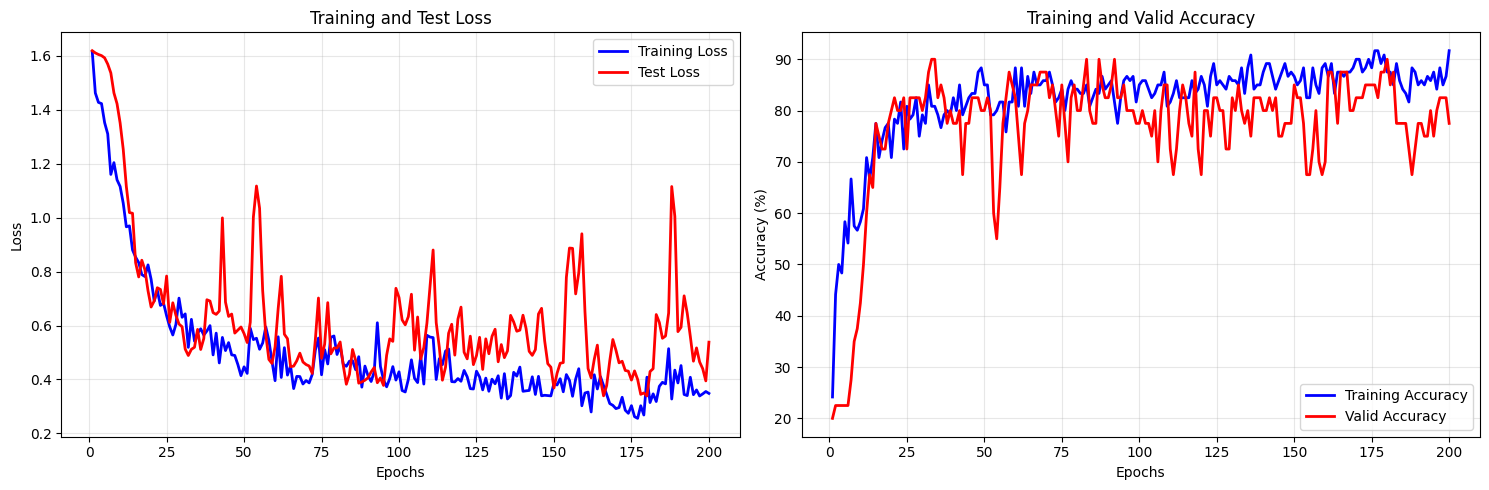

In [75]:
from torch.utils.data import DataLoader
from IPython.display import clear_output


# Initialize datasets & dataloaders
train_data = train_dataset # here is your code
valid_data = valid_dataset # here is your code

train_loader = DataLoader(train_data, batch_size=32, shuffle=True, num_workers=2) # here is your code
valid_loader = DataLoader(valid_data, batch_size=32, shuffle=False, num_workers=2) # here is your code


test_dataset = SimpleAudioDataset(
    test_df,
    audio_dir=audio_dir,
    target_sr=16000,
    max_length=16000,
    do_augmentation=False,
    classes=train_dataset.classes
)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=2)

# Model, Loss, Optimizer
device = "cuda" if torch.cuda.is_available() else "cpu"
model = SoundClassificatonModel().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


train_losses = []
train_accuracies = []
valid_losses = []
valid_accuracies = []

n_epochs = 200# here is your code
for epoch in range(n_epochs):

    # Train
    model.train()

    epoch_train_loss = 0
    train_correct = 0
    train_total = 0

    for signals, labels in train_loader:

        # load data to device
        signals, labels = signals.to(device), labels.to(device)

        # Forward pass
        predictions = model(signals)
        train_loss = criterion(predictions, labels)
        # train_accuracy = # here is your code

        _, predicted = torch.max(predictions.data, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()

        # Backward pass
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()

        epoch_train_loss += train_loss.item()

    # Evaluation
    model.eval()

    epoch_valid_loss = 0
    valid_correct = 0
    valid_total = 0

    with torch.no_grad():
        for signals, labels in valid_loader:
            # load data to device
            signals, labels = signals.to(device), labels.to(device)

            # Forward pass
            predictions = model(signals)
            valid_loss = criterion(predictions, labels)
            # valid_accuracy = # here is your code

            _, predicted = torch.max(predictions.data, 1)
            valid_total += labels.size(0)
            valid_correct += (predicted == labels).sum().item()

            epoch_valid_loss += valid_loss.item()

    # Calculate average test loss and accuracy for this epoch
    epoch_train_loss = epoch_train_loss / len(train_loader) # here is your code
    epoch_train_acc = 100 * train_correct / train_total # here is your code

    epoch_valid_loss = epoch_valid_loss / len(valid_loader) # here is your code
    epoch_valid_acc = 100 * valid_correct / valid_total # here is your code

    # Store metrics
    train_losses.append(epoch_train_loss)
    train_accuracies.append(epoch_train_acc)
    valid_losses.append(epoch_valid_loss)
    valid_accuracies.append(epoch_valid_acc)

    plot_metrics(train_losses, train_accuracies, valid_losses, valid_accuracies)
    clear_output(wait=True)

In [96]:
print("Train Accuracy = ", train_accuracies[-1])
print("Valid Accuracy = ", valid_accuracies[-1])

Train Accuracy =  91.66666666666667
Valid Accuracy =  77.5


### **Part 4. Test Demo for ESC-50**

Для вашего удобства предоставляется код для тестирования модели и отрисовки формы сигналов, прогноза и топ-5 наиболее вероятных классов.

Using device: cuda
ESC-50 Audio Classification Demo!


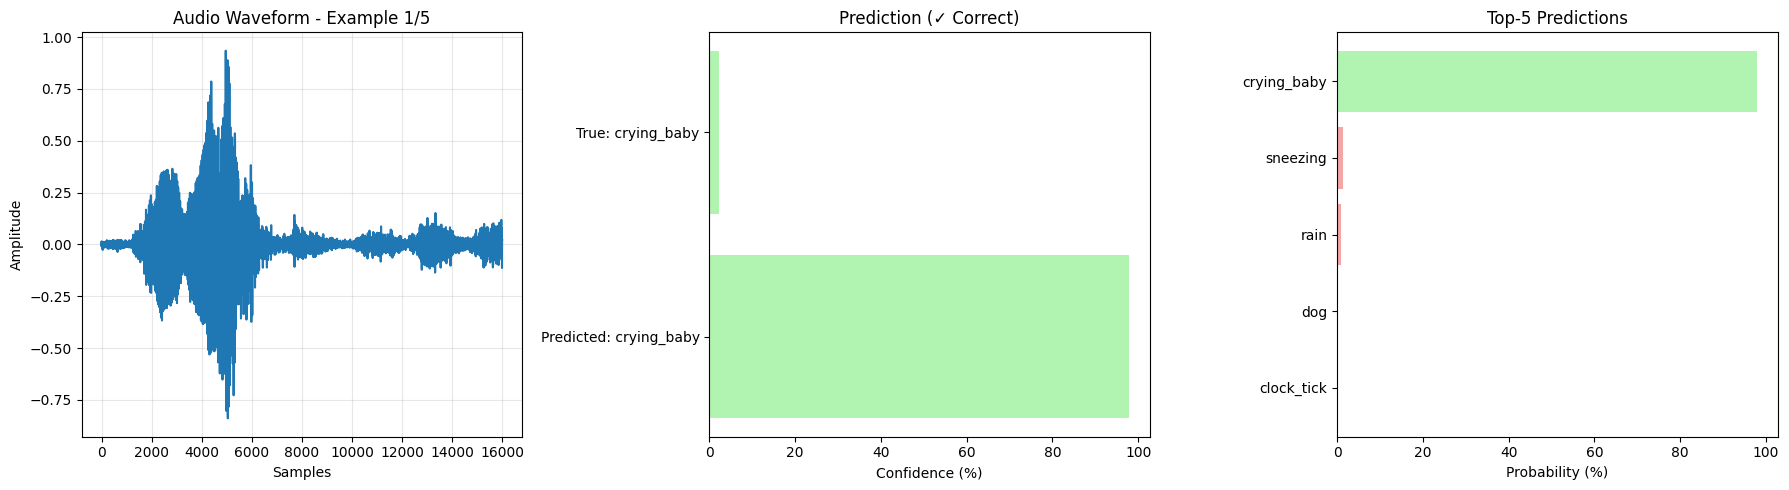

Playing: crying_baby


Prediction: crying_baby (97.87%)
True label: crying_baby
Correct: True


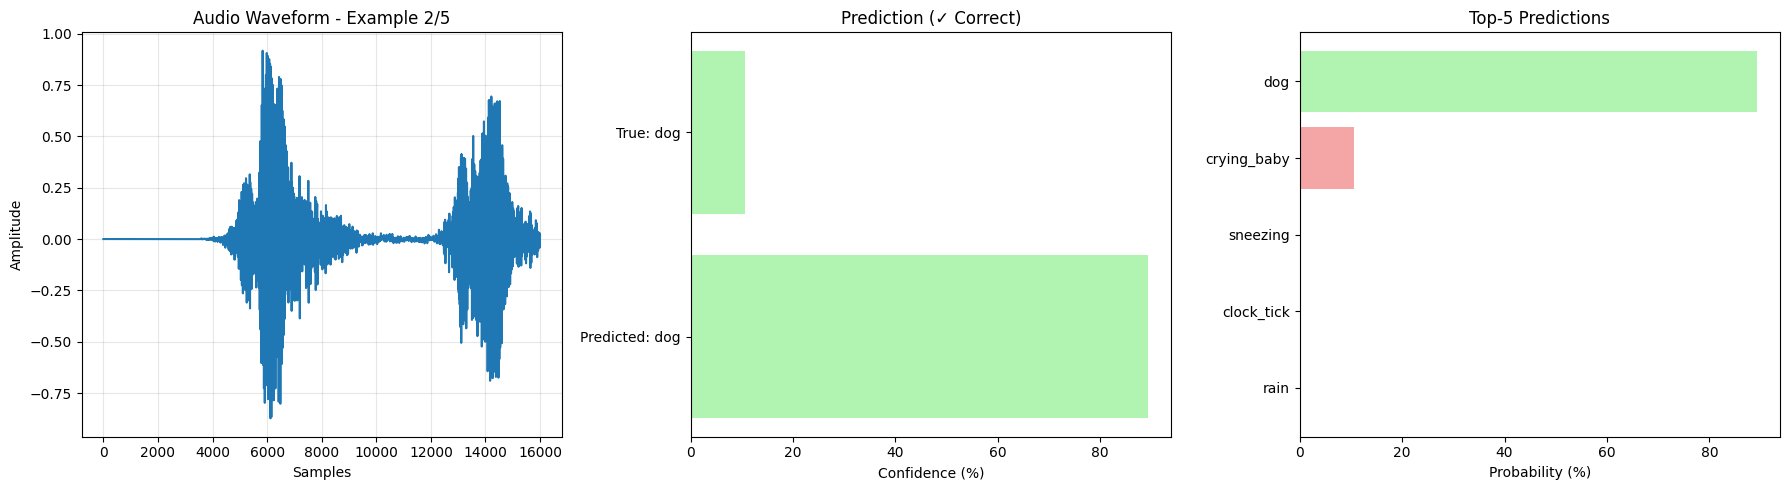

Playing: dog


Prediction: dog (89.33%)
True label: dog
Correct: True


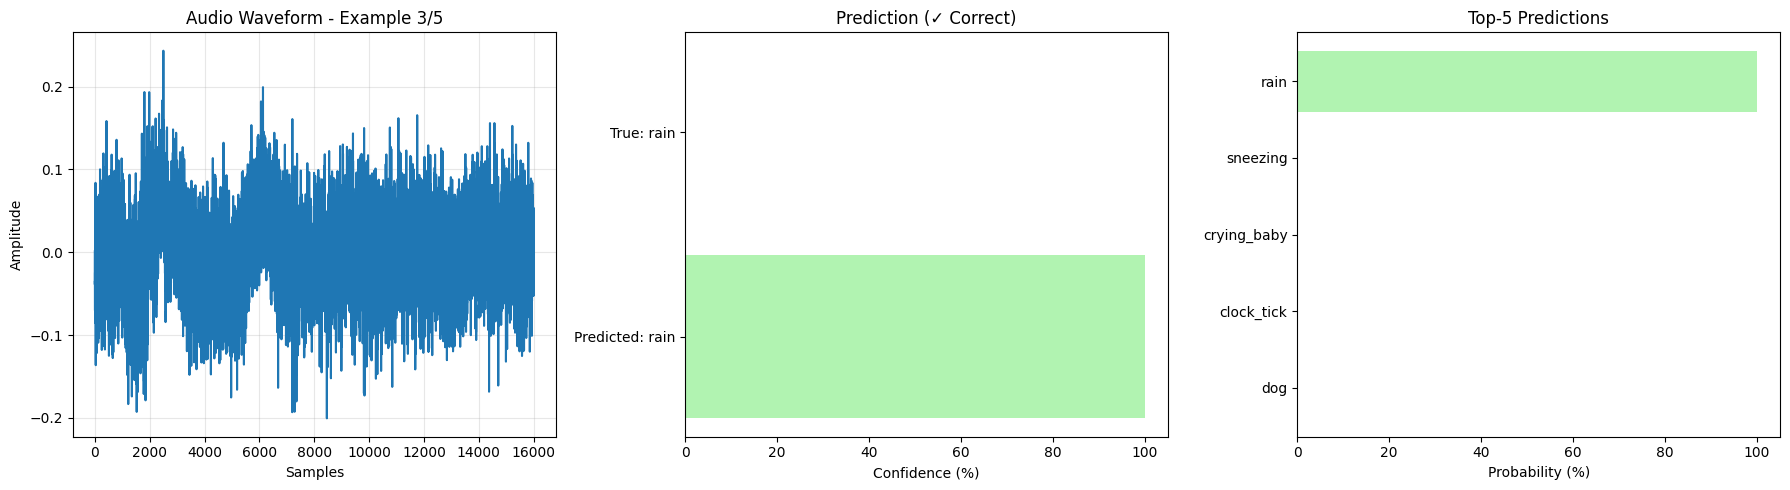

Playing: rain


Prediction: rain (100.00%)
True label: rain
Correct: True


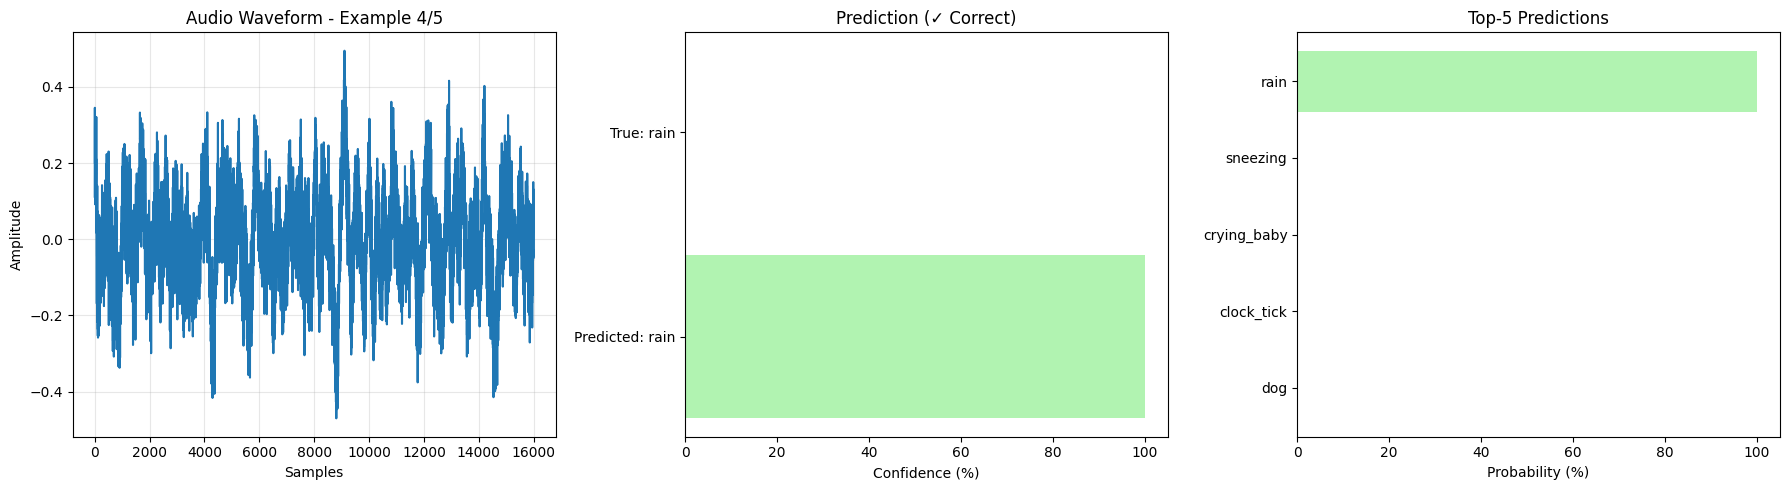

Playing: rain


Prediction: rain (100.00%)
True label: rain
Correct: True


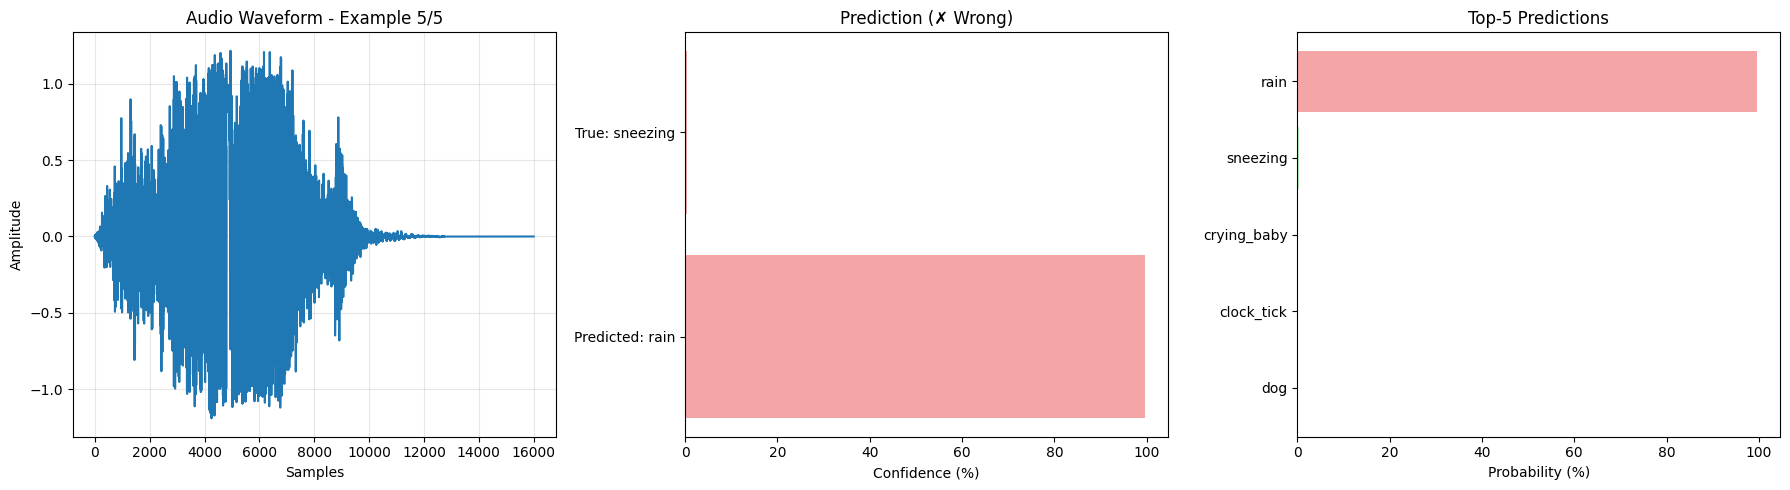

Playing: sneezing


Prediction: rain (99.59%)
True label: sneezing
Correct: False
ESC-50 Test Set Evaluation (Fold 5):
Correct: 31/40
Accuracy: 77.50%


In [97]:
class ESC50TestDemo:
    def __init__(self, model, test_dataset, device):
        self.model = model
        self.test_dataset = test_dataset
        self.device = device
        self.classes = test_dataset.classes
        self.model.eval()  # Set to evaluation mode

    def predict_audio(self, signal):
        """Predict class for a single audio signal"""
        with torch.no_grad():
            signal = signal.unsqueeze(0).to(self.device)  # Add batch dimension
            outputs = self.model(signal)
            probabilities = torch.softmax(outputs, dim=1)
            confidence, predicted = torch.max(probabilities, 1)

        return predicted.item(), confidence.item(), probabilities.cpu().numpy()[0]

    def run_interactive_demo(self, num_examples=1):
        """Run interactive demo with random test examples"""
        print("ESC-50 Audio Classification Demo!")
        print("=" * 60)

        # Get random test examples
        indices = np.random.choice(len(self.test_dataset), num_examples, replace=False)

        for i, idx in enumerate(indices):
            # Load audio and true label
            signal, true_label = self.test_dataset[idx]
            true_class = self.classes[true_label]

            # Get prediction
            predicted_idx, confidence, all_probs = self.predict_audio(signal)
            predicted_class = self.classes[predicted_idx]

            # Clear previous output
            # clear_output(wait=True)

            # Create plot
            fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

            # Plot waveform
            ax1.plot(signal.squeeze().numpy())
            ax1.set_title(f'Audio Waveform - Example {i+1}/{num_examples}')
            ax1.set_xlabel('Samples')
            ax1.set_ylabel('Amplitude')
            ax1.grid(True, alpha=0.3)

            # Plot prediction info
            colors = ['lightcoral', 'lightgreen']
            correct = predicted_class == true_class
            ax2.barh([0, 1], [confidence * 100, (1-confidence) * 100],
                     color=colors[correct], alpha=0.7)
            ax2.set_yticks([0, 1])
            ax2.set_yticklabels([f'Predicted: {predicted_class}',
                               f'True: {true_class}'])
            ax2.set_xlabel('Confidence (%)')
            ax2.set_title(f'Prediction ({"✓ Correct" if correct else "✗ Wrong"})')

            # Plot top-5 predictions
            top5_indices = np.argsort(all_probs)[-5:][::-1]
            top5_classes = [self.classes[idx] for idx in top5_indices]
            top5_probs = all_probs[top5_indices]

            colors = ['lightgreen' if cls == true_class else 'lightcoral' for cls in top5_classes]
            ax3.barh(range(5), top5_probs * 100, color=colors, alpha=0.7)
            ax3.set_yticks(range(5))
            ax3.set_yticklabels(top5_classes)
            ax3.set_xlabel('Probability (%)')
            ax3.set_title('Top-5 Predictions')
            ax3.invert_yaxis()  # Highest probability at top

            plt.tight_layout()
            plt.show()

            # Display audio player
            print(f"Playing: {true_class}")
            display(Audio(signal.squeeze().numpy(), rate=16000))

            print(f"Prediction: {predicted_class} ({confidence:.2%})")
            print(f"True label: {true_class}")
            print(f"Correct: {correct}")
            print("=" * 60)


    def evaluate_test_set(self):
        """Evaluate on entire test set"""
        test_loader = DataLoader(self.test_dataset, batch_size=32, shuffle=False)
        self.model.eval()
        correct = 0
        total = 0
        all_predictions = []
        all_labels = []

        with torch.no_grad():
            for data, target in test_loader:
                data, target = data.to(self.device), target.to(self.device)
                outputs = self.model(data)
                _, predicted = torch.max(outputs.data, 1)

                total += target.size(0)
                correct += (predicted == target).sum().item()

                all_predictions.extend(predicted.cpu().numpy())
                all_labels.extend(target.cpu().numpy())

        accuracy = 100 * correct / total
        print(f"ESC-50 Test Set Evaluation (Fold 5):")
        print(f"Correct: {correct}/{total}")
        print(f"Accuracy: {accuracy:.2f}%")

        return accuracy, all_predictions, all_labels

# Usage
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Create demo
demo = ESC50TestDemo(model, valid_dataset, device)

# Run interactive demo
demo.run_interactive_demo(num_examples=5)

# Evaluate on entire test set
test_accuracy, predictions, true_labels = demo.evaluate_test_set()

### **Create submission to Stepik**

Вам нужно:
* **1 шаг.** сделать предсказания для `test.csv` при помощи лучшей модели
* **2 шаг.** создать `submission.csv` файл с колонкой `category`, положить туда свои предсказания и сохранить файл.

In [102]:
test_dataset = SimpleAudioDataset(
    test_df,
    audio_dir=audio_dir,
    target_sr=16000,
    max_length=16000,
    do_augmentation=False,
    classes=train_dataset.classes
)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=2)

In [104]:
model.eval()
predictions = []

with torch.no_grad():
    for signals, _ in test_loader:
        signals = signals.to(device)
        outputs = model(signals)
        _, preds = torch.max(outputs, 1)
        predictions.extend(preds.cpu().numpy())

y_test_pred = [train_dataset.classes[pred] for pred in predictions]

In [106]:
submission = pd.read_csv("/content/test.csv")
submission['category'] = y_test_pred
submission.to_csv("/content/submission.csv", index=False)

### **Report**

Опишите ваш путь экспериментов и что вы сделали, чтобы получить наилучшую модель.

Пайплайн обучения с семинара +

Предобработка аудио:
- Ресемпл до 16000 Гц
- Конвертация стерео в моно звук
- Фиксированная длина сэмплов (1 секунда)
- Обрезка трека для единообразия длины

Аугментации (помогли избежать переобучения):
- изменение громкости
- инверсия полярности

CNN (Conv1d + BatchNorm + ReLU + MaxPool)